# 모델링(숨긴코드는 전처리및 EDA)

In [ ]:
!pip install -U finance-datareader
import FinanceDataReader as fdr

In [ ]:
# 코스피 데이터 확인

df_krx = fdr.StockListing('KOSPI')
df_krx.head(50)

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,72300,2,-900,-1.23,72600,72900,72000,4902277,354956560400,431615278365000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,156400,2,-1600,-1.01,154900,156800,154500,894281,139017074000,113859569886000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,397000,2,-3500,-0.87,399000,399500,394000,32829,13000852000,92898000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,778000,2,-23000,-2.87,796000,801000,772000,40689,31724444000,55373372000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,248000,3,0,0.00,246500,249000,243500,407260,100503143500,52459813488000,211531506,STK
5,005935,KR7005931001,삼성전자우,KOSPI,,61200,2,-200,-0.33,61300,61400,61100,200601,12295061100,50360666040000,822886700,STK
6,000270,KR7000270009,기아,KOSPI,,123500,1,5800,4.93,118300,124000,117500,1735339,209935696900,49652459070500,402044203,STK
7,068270,KR7068270008,셀트리온,KOSPI,,186300,2,-3700,-1.95,189600,191300,184300,241643,45094025700,40622670660600,218049762,STK
8,005490,KR7005490008,POSCO홀딩스,KOSPI,,436500,2,-1000,-0.23,435500,437000,432000,95606,41495317000,36915341895000,84571230,STK
9,035420,KR7035420009,NAVER,KOSPI,,199800,2,-4200,-2.06,200000,200500,198600,281834,56145281200,32449237081200,162408594,STK


In [ ]:
# 전체 코스피 상장 주식의 수

len(df_krx)

954

In [ ]:
# 코스피 가격 폴더 생성

import os
folder = "KOSPI_price"
if not os.path.isdir(folder):
    os.mkdir(folder)

In [ ]:
# 상위 100개의 코스피 주식 csv변환

import csv
import pandas as pd
import datetime

stock_list = [] # 주식 이름 저장

for idx, row in df_krx.iterrows():
    if idx >= 100:
        break

    sym, name = row['Code'], row['Name']
    stock_list.append(name)

    csv_name = os.path.join(folder, f'{name}.csv')
    print(csv_name, end=' ')

    # 2019년 부터 어제 까지의 주식 데이터 추출
    today = datetime.date.today()
    yesterday = today - datetime.timedelta(days=1)
    df = fdr.DataReader(sym, '2019-01-01', yesterday)

    # 주식 코드번호 추가
    df['Code'] = sym

    # 이동 평균선 추가 (5, 10, 20, 60, 120일)
    days = [5, 10, 20, 60, 120]
    for day in days:
        df[f'{day}일 주가 이동평균'] = df['Close'].rolling(window = day, min_periods = 1).mean()

    print(len(df), 'rows') # 전체 데이터의 수
    df.rename(columns = {"Open": "시작가", "High": "장중 최고가", "Low": "장중 최저가", "Close": "종가", "Volume": "거래량", "Change": "전날 종가 대비 변동량", "Code": "종목 번호"}, inplace = True)
    df.to_csv(csv_name, quoting=csv.QUOTE_MINIMAL)


KOSPI_price/삼성전자.csv 1273 rows
KOSPI_price/SK하이닉스.csv 1273 rows
KOSPI_price/LG에너지솔루션.csv 513 rows
KOSPI_price/삼성바이오로직스.csv 1273 rows
KOSPI_price/현대차.csv 1273 rows
KOSPI_price/삼성전자우.csv 1273 rows
KOSPI_price/기아.csv 1273 rows
KOSPI_price/셀트리온.csv 1273 rows
KOSPI_price/POSCO홀딩스.csv 1273 rows
KOSPI_price/NAVER.csv 1273 rows
KOSPI_price/LG화학.csv 1273 rows
KOSPI_price/삼성물산.csv 1273 rows
KOSPI_price/삼성SDI.csv 1273 rows
KOSPI_price/KB금융.csv 1273 rows
KOSPI_price/카카오.csv 1273 rows
KOSPI_price/포스코퓨처엠.csv 1273 rows
KOSPI_price/현대모비스.csv 1273 rows
KOSPI_price/신한지주.csv 1273 rows
KOSPI_price/삼성생명.csv 1273 rows
KOSPI_price/메리츠금융지주.csv 1273 rows
KOSPI_price/하나금융지주.csv 1273 rows
KOSPI_price/한국전력.csv 1273 rows
KOSPI_price/LG전자.csv 1273 rows
KOSPI_price/LG.csv 1273 rows
KOSPI_price/SK.csv 1273 rows
KOSPI_price/카카오뱅크.csv 630 rows
KOSPI_price/삼성화재.csv 1273 rows
KOSPI_price/에코프로머티.csv 69 rows
KOSPI_price/HMM.csv 1273 rows
KOSPI_price/KT&G.csv 1273 rows
KOSPI_price/삼성에스디에스.csv 1273 rows
KOSPI_price/SK이노베이션.c

In [ ]:
# 상위 100개 주식 종목명

print(stock_list)

['삼성전자', 'SK하이닉스', 'LG에너지솔루션', '삼성바이오로직스', '현대차', '삼성전자우', '기아', '셀트리온', 'POSCO홀딩스', 'NAVER', 'LG화학', '삼성물산', '삼성SDI', 'KB금융', '카카오', '포스코퓨처엠', '현대모비스', '신한지주', '삼성생명', '메리츠금융지주', '하나금융지주', '한국전력', 'LG전자', 'LG', 'SK', '카카오뱅크', '삼성화재', '에코프로머티', 'HMM', 'KT&G', '삼성에스디에스', 'SK이노베이션', 'SK텔레콤', '우리금융지주', '기업은행', '크래프톤', 'HD현대중공업', '삼성전기', '두산에너빌리티', 'KT', '포스코인터내셔널', '한화에어로스페이스', '고려아연', 'SK스퀘어', 'S-Oil', '한미반도체', '하이브', '대한항공', '포스코DX', 'HD한국조선해양', '한화오션', 'SK바이오팜', '현대글로비스', '아모레퍼시픽', '삼성중공업', 'DB손해보험', '한국타이어앤테크놀로지', '카카오페이', '엘앤에프', '코스모신소재', '현대차2우B', 'HD현대', '금양', '유한양행', '미래에셋증권', '맥쿼리인프라', '롯데케미칼', '넷마블', 'SK아이이테크놀로지', 'LG생활건강', '한국항공우주', '삼성엔지니어링', '두산로보틱스', '한화솔루션', 'LG이노텍', 'SK바이오사이언스', '현대제철', '두산밥캣', 'HD현대일렉트릭', 'LG유플러스', 'GS', '한진칼', 'CJ제일제당', '삼성카드', '금호석유', '한미약품', '엔씨소프트', '현대오토에버', '코웨이', 'LG디스플레이', '한국금융지주', 'NH투자증권', '현대건설', '현대차우', '강원랜드', '오리온', '현대로템', '삼성증권', '쌍용C&E', '한온시스템']


In [ ]:
# 삼성전자 csv확인

sample = stock_list[0]
csv_name = os.path.join(folder, f'{sample}.csv')
samsung = pd.read_csv(csv_name, parse_dates=True, index_col='Date')
samsung.head()

,시작가,장중 최고가,장중 최저가,종가,거래량,전날 종가 대비 변동량,종목 번호,5일 주가 이동평균,10일 주가 이동평균,20일 주가 이동평균,60일 주가 이동평균,120일 주가 이동평균
Date,,,,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,5930,38750.000000,38750.000000,38750.000000,38750.000000,38750.000000
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,5930,38175.000000,38175.000000,38175.000000,38175.000000,38175.000000
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,5930,37933.333333,37933.333333,37933.333333,37933.333333,37933.333333
2019-01-07,38000,38900,37800,38750,12748997,0.034713,5930,38137.500000,38137.500000,38137.500000,38137.500000,38137.500000
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,5930,38130.000000,38130.000000,38130.000000,38130.000000,38130.000000


In [ ]:
import pandas as pd
import os

# 폴더와 파일 이름 설정
folder = "KOSPI_price"
sample = "삼성전자"
csv_name = os.path.join(folder, f'{sample}.csv')

# 'Date' 컬럼을 인덱스로 하여 CSV 파일 로드
samsung = pd.read_csv(csv_name, parse_dates=True, index_col='Date')

# 인덱스(날짜)에 따라 내림차순으로 데이터프레임 정렬
samsung_sorted = samsung.sort_index(ascending=False)

# 상위 5개 행 출력
print(samsung_sorted.head())

              시작가  장중 최고가  장중 최저가     종가       거래량  전날 종가 대비 변동량  종목 번호  \
Date                                                                      
2024-02-28  72900   73900   72800  73200  11795859      0.004115   5930   
2024-02-27  73100   73400   72700  72900  13201981      0.001374   5930   
2024-02-26  72300   73200   72200  72800  14669352     -0.001372   5930   
2024-02-23  73600   74200   72900  72900  16225166     -0.002736   5930   
2024-02-22  73800   73900   72700  73100  15208934      0.001370   5930   

            5일 주가 이동평균  10일 주가 이동평균  20일 주가 이동평균   60일 주가 이동평균  120일 주가 이동평균  
Date                                                                          
2024-02-28     72980.0      73080.0      73680.0  73996.666667  71903.333333  
2024-02-27     72940.0      73160.0      73740.0  73988.333333  71852.500000  
2024-02-26     73020.0      73390.0      73765.0  73985.000000  71801.666667  
2024-02-23     73220.0      73520.0      73830.0  73960.000000  71751.666667  


# **EDA**

In [ ]:
# matplotlib에 한글 깨짐 방지

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt-get -qq install fonts-nanum

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe) # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 8, 'font.family': 'NanumGothic'})

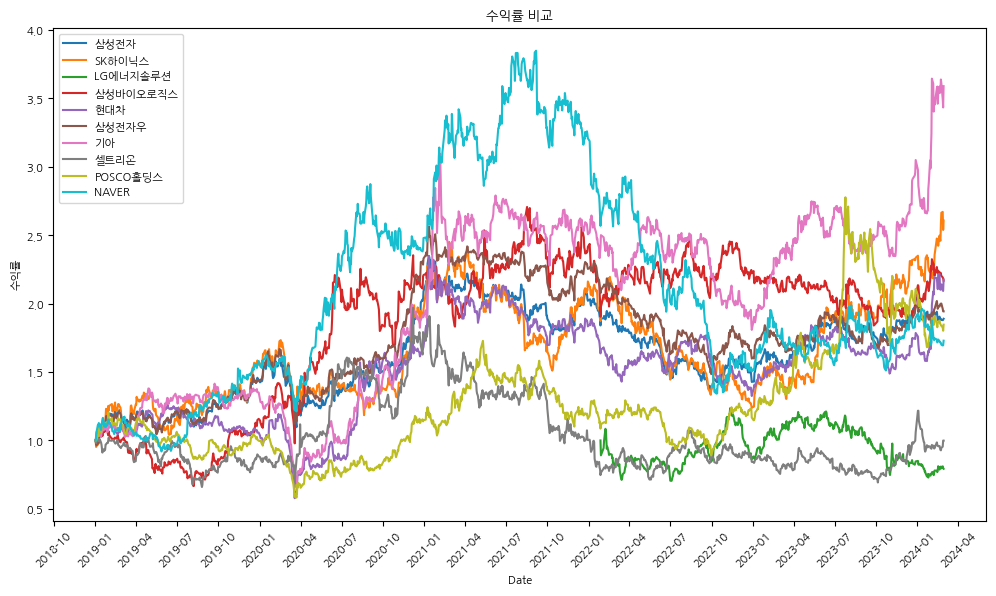

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(10, 6))

# 상위 10개 종목 종가(수익률) 비교
for idx, stock in enumerate(stock_list):
    csv_name = os.path.join(folder, f'{stock}.csv')
    stock_df = pd.read_csv(csv_name, parse_dates=['Date'])

    initial_close_price = stock_df.loc[0, '종가']
    stock_df['정규화된 종가'] = stock_df['종가'] / initial_close_price # 시작일을 1로 생각하고 정규화
    stock_df.to_csv(csv_name, index=False)

    if idx < 10:
        plt.plot(stock_df['Date'], stock_df['정규화된 종가'], label = stock)

# X축을 분기별로 표시
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('수익률')
plt.title('수익률 비교')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

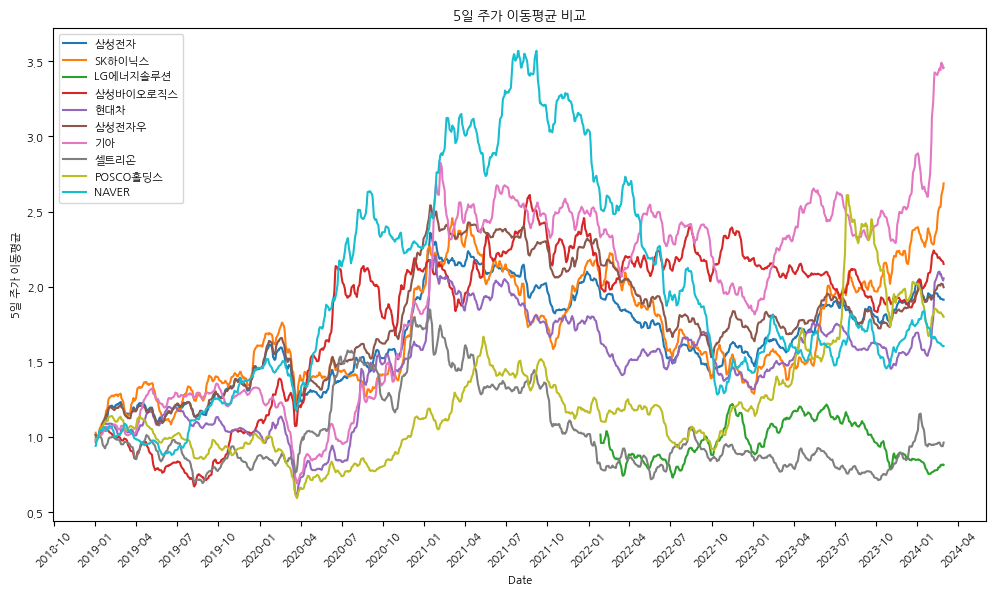

In [ ]:
# 5일 주가 이동평균 비교

plt.figure(figsize=(10, 6))

for num in [5, 10, 20, 60, 120]:
    for idx, stock in enumerate(stock_list):
        csv_name = os.path.join(folder, f'{stock}.csv')
        stock_df = pd.read_csv(csv_name, parse_dates=['Date'])

        # 예외처리 -> 데이터 수가 120개가 안되는 경우가 있어서 오류
        try:
            initial_mov = stock_df.loc[num - 1, f'{num}일 주가 이동평균']
            stock_df[f'정규화된 {num}일 주가 이동평균'] = stock_df[f'{num}일 주가 이동평균'] / initial_mov
        except:
            stock_df[f'정규화된 {num}일 주가 이동평균'] = stock_df[f'{num}일 주가 이동평균']
        stock_df.to_csv(csv_name, index=False)

        if num == 5 and idx < 10:
            plt.plot(stock_df['Date'], stock_df['정규화된 5일 주가 이동평균'], label = stock)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Date')
plt.ylabel('5일 주가 이동평균')
plt.title('5일 주가 이동평균 비교')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 주식간 상관관계 조사

returns_df = pd.DataFrame()

for stock in stock_list:
    csv_name = os.path.join(folder, f'{stock}.csv')
    stock_df = pd.read_csv(csv_name, parse_dates=['Date'])

    # 일일 수익률 계산
    stock_df[f'{stock} 일일 상승률'] = stock_df['종가'].pct_change()
    stock_df.to_csv(csv_name, index=False)
    stock_df = stock_df[1:]
    stock_df.set_index('Date', inplace=True)
    returns_df = pd.concat([returns_df, stock_df[f'{stock} 일일 상승률']], axis=1) # 일일 수익률 데이터에 추가

# 상관관계 계산
correlation_matrix = returns_df.corr()

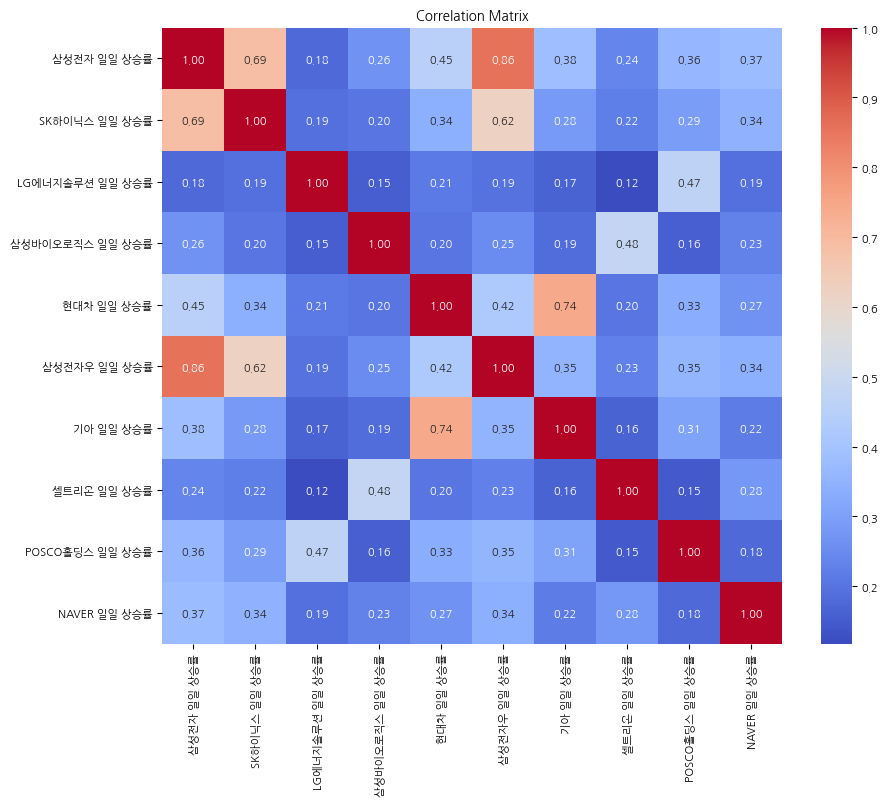

In [ ]:
# 상위 10개의 기업만 상관관계 출력

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.iloc[:10, :10], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# 상관관계 높은 기업 상위 20개 추출

idx, vals = [], []
for i, value in enumerate(correlation_matrix.columns.values):
    for j in correlation_matrix.columns.values[i + 1:]:
        idx.append((value, j))
        vals.append(correlation_matrix[value][j])

series = pd.Series(data = vals, index = idx)
series = series.sort_values(ascending = False)
series[:20]

(현대차2우B 일일 상승률, 현대차우 일일 상승률)      0.894682
(삼성전자 일일 상승률, 삼성전자우 일일 상승률)       0.857320
(현대차 일일 상승률, 현대차우 일일 상승률)         0.829764
(KB금융 일일 상승률, 하나금융지주 일일 상승률)      0.827460
(현대차 일일 상승률, 현대차2우B 일일 상승률)       0.819580
(NH투자증권 일일 상승률, 삼성증권 일일 상승률)      0.815683
(신한지주 일일 상승률, 하나금융지주 일일 상승률)      0.812181
(KB금융 일일 상승률, 신한지주 일일 상승률)        0.809826
(우리금융지주 일일 상승률, 기업은행 일일 상승률)      0.795713
(미래에셋증권 일일 상승률, 삼성증권 일일 상승률)      0.775810
(신한지주 일일 상승률, 기업은행 일일 상승률)        0.774776
(미래에셋증권 일일 상승률, NH투자증권 일일 상승률)    0.767510
(한국금융지주 일일 상승률, 삼성증권 일일 상승률)      0.767148
(하나금융지주 일일 상승률, 우리금융지주 일일 상승률)    0.760310
(하나금융지주 일일 상승률, 기업은행 일일 상승률)      0.758589
(신한지주 일일 상승률, 우리금융지주 일일 상승률)      0.750367
(KB금융 일일 상승률, 기업은행 일일 상승률)        0.744490
(현대차 일일 상승률, 기아 일일 상승률)           0.742365
(KB금융 일일 상승률, 우리금융지주 일일 상승률)      0.735848
(카카오뱅크 일일 상승률, 카카오페이 일일 상승률)      0.731711
dtype: float64

---
# 데이터세트 분할(전처리)

In [ ]:
# 훈련 세트 나누기

def split_train_test(csv_path, split_ratio):
    df = pd.read_csv(csv_path, parse_dates=['Date'])
    split_index = int(len(df) * split_ratio)
    train_set = df[:split_index]
    test_set = df[split_index:]
    return train_set, test_set

def split_train_validation(train_set, validation_ratio):
    validation_index = int(len(train_set) * validation_ratio)
    new_train_set = train_set[:validation_index]
    validation_set = train_set[validation_index:]
    return new_train_set, validation_set

def create_X_y_datasets(dataset):
    X = dataset.drop(['종가'], axis=1)[:-1]   # 종가를 제외한 모든 데이터
    y = dataset['종가'].shift(-1)[:-1]   # 날짜와 종가만 포함 ? 날짜 제거...?
    return X, y

for stock in stock_list:
    csv_name = os.path.join(folder, f'{stock}.csv')
    train_set, test_set = split_train_test(csv_name, split_ratio = 0.8)
    X_test, y_test = create_X_y_datasets(test_set)
    X_test.to_csv(os.path.join(folder, f'X_test_{stock}.csv'), index = False)
    y_test.to_csv(os.path.join(folder, f'y_test_{stock}.csv'), index = False)

    # 검증 세트 생성
    new_train_set, validation_set = split_train_validation(train_set, validation_ratio = 0.8)
    new_train_set.to_csv(os.path.join(folder, f'train_{stock}.csv'), index = False)
    validation_set.to_csv(os.path.join(folder, f'valid_{stock}.csv'), index = False)
    X_train, y_train = create_X_y_datasets(new_train_set)
    X_valid, y_valid = create_X_y_datasets(validation_set)

    X_train.to_csv(os.path.join(folder, f'X_train_{stock}.csv'), index = False)
    y_train.to_csv(os.path.join(folder, f'y_train_{stock}.csv'), index = False)
    X_valid.to_csv(os.path.join(folder, f'X_valid_{stock}.csv'), index = False)
    y_valid.to_csv(os.path.join(folder, f'y_valid_{stock}.csv'), index = False)

---
# 랜덤포레스트 모델 학습
## 검증, 평가 때 보고 싶은 종목을 직접 입력하여 넣어야함(같은 종목으로 할 것)

## 날짜형 변수"####-##-##"은 입력이 안돼서 특성을 빼거나 정수형으로 치환하거나 였는데 어떻게 할 지 몰라서 일단 치환하는 함수를 지피티 이용하여 넣
## 알 수 없는 Nan값에 대해(대체 뭔지 알 수가 없네..) 그냥 알아서 평균으로 치환해주도록 하는 함수도 추가,,


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import numpy as np
from datetime import datetime
import joblib  # 모델 저장 및 로드에 사용
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# 모델 훈련 함수
def train_model(X_train, y_train):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

# 모델 평가 함수
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("MSE:", mse)
    print("MAE:", mae)
    print("R^2:", r2)


# 상위 5개의 가장 좋은 예측값을 보여주는 함수
# 상위 5개의 가장 좋은 예측값을 보여주는 함수
def show_top_5_predictions(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = np.abs(y_test - predictions)  # 절대 오차 계산

    # 오차를 기준으로 상위 5개의 가장 좋은 예측값 찾기
    top_5_indices = np.argsort(errors)[:5]  # 오차가 가장 작은 상위 5개의 인덱스

    print("상위 5개의 가장 좋은 예측값:")
    for index in top_5_indices:
        # X_test의 'Date' 컬럼에서 날짜 데이터를 가져와서 변환
        date = convert_float_to_date(X_test.iloc[index]['Date'])
        print(f"인덱스: {index}, 날짜: {date}, 실제값: {y_test.iloc[index]}, 예측값: {predictions[index]}, 절대 오차: {errors[index]}")


# 날짜 칼럼을 수치형으로 변환하는 함수
def convert_date_to_numeric(df, date_column='Date'):
    """
    날짜 칼럼을 연월일 정보를 합친 숫자 형태로 변환합니다.
    예: '2019-01-02' -> 20190102
    """
    df[date_column] = pd.to_datetime(df[date_column])  # 날짜 형식을 datetime 객체로 변환
    df[date_column] = df[date_column].apply(lambda x: x.year*10000 + x.month*100 + x.day)  # 연월일을 숫자로 변환
    return df

# 날짜를 올바른 문자열 형식으로 변환하는 함수
def convert_float_to_date(float_date):
    str_date = str(int(float_date))
    # YYYYMMDD 형식에 맞게 문자열을 나눕니다
    year = str_date[:4]
    month = str_date[4:6]
    day = str_date[6:8]
    # '-'를 사용하여 조합된 날짜 문자열을 반환
    return f"{year}-{month}-{day}"

# NaN 값을 평균으로 대치하는 함수
def impute_missing_values(X):
    imputer = SimpleImputer(strategy='mean')
    for column in X.columns:
        # 각 컬럼에 대해 누락된 값을 평균으로 대체
        X[column] = imputer.fit_transform(X[[column]])
    return X

In [ ]:


# 모델 훈련, 검증, 테스트를 위한 코드 수정
folder = "KOSPI_price"
stock_list = os.listdir(folder) # 주식 리스트를 폴더 내의 파일 목록으로부터 얻음
# 사용자 입력으로 주식 이름 받기
base_name = input("Enter the stock name you want to validate: ")

# 모델 훈련, 검증, 테스트를 위한 코드 수정
for stock in stock_list:
    if stock.startswith(f'X_train_{base_name}.csv'):  # 정확한 파일 이름 매칭
        # 주식 이름 추출 로직은 제거 (이미 base_name을 사용자가 명확히 입력)

        # 파일 읽기 및 데이터 처리
        X_train = pd.read_csv(os.path.join(folder, f'X_train_{base_name}.csv'))
        y_train = pd.read_csv(os.path.join(folder, f'y_train_{base_name}.csv'))['종가']
        X_valid = pd.read_csv(os.path.join(folder, f'X_valid_{base_name}.csv'))
        y_valid = pd.read_csv(os.path.join(folder, f'y_valid_{base_name}.csv'))['종가']

        # 날짜 칼럼이 있다면 수치형으로 변환
        if 'Date' in X_train.columns:
            X_train = convert_date_to_numeric(X_train, 'Date')
            X_valid = convert_date_to_numeric(X_valid, 'Date')

        # NaN 값 대치
        X_train = impute_missing_values(X_train)
        X_valid = impute_missing_values(X_valid)

        # 모델 훈련
        print(f"Training model for {base_name}...")
        model = train_model(X_train, y_train)

        # 검증 데이터로 모델 평가
        print(f"Evaluating model on validation set for {base_name}...")
        evaluate_model(model, X_valid, y_valid)

Enter the stock name you want to validate: 대한항공
Training model for 대한항공...
Evaluating model on validation set for 대한항공...
MSE: 1714752.8773083745
MAE: 1106.5974384236454
R^2: 0.6478764738090861


In [ ]:
# 사용자 입력으로 주식 이름 받기
stock_name = input("Enter the stock name you want to evaluate: ")

folder = "KOSPI_price"
X_test_path = os.path.join(folder, f'X_test_{stock_name}.csv')
y_test_path = os.path.join(folder, f'y_test_{stock_name}.csv')

if os.path.exists(X_test_path) and os.path.exists(y_test_path):
    X_test = pd.read_csv(X_test_path)
    y_test = pd.read_csv(y_test_path)['종가']

    # 날짜 칼럼이 있다면 수치형으로 변환
    if 'Date' in X_test.columns:
        X_test = convert_date_to_numeric(X_test, 'Date')

    # NaN 값 대치
    X_test = impute_missing_values(X_test)

    # RandomForestRegressor 사용 (예시, 실제 사용 시 사전에 훈련된 모델 로드 필요)
    model = RandomForestRegressor(n_estimators=100, random_state=42)

    # 모델 훈련 데이터 로드 및 훈련 (예시로만 포함)
    X_train_path = os.path.join(folder, f'X_train_{stock_name}.csv')
    y_train_path = os.path.join(folder, f'y_train_{stock_name}.csv')
    if os.path.exists(X_train_path) and os.path.exists(y_train_path):
        X_train = pd.read_csv(X_train_path)
        y_train = pd.read_csv(y_train_path)['종가']

        # 날짜 칼럼이 있다면 수치형으로 변환
        if 'Date' in X_train.columns:
            X_train = convert_date_to_numeric(X_train, 'Date')

        # NaN 값 대치
        X_train = impute_missing_values(X_train)

        model.fit(X_train, y_train)  # 모델 훈련

    # 테스트 데이터로 최종 모델 평가
    print(f"Final evaluation on test set for {stock_name}...")
    evaluate_model(model, X_test, y_test)
    show_top_5_predictions(model, X_test, y_test)
else:
    print(f"Test data for {stock_name} not found.")

# 모델 저장
model_path = os.path.join(folder, f'model_{stock_name}.joblib')
joblib.dump(model, model_path)

Enter the stock name you want to evaluate: 대한항공
Final evaluation on test set for 대한항공...
MSE: 636971.7636102362
MAE: 618.7329133858268
R^2: 0.600301281083635
상위 5개의 가장 좋은 예측값:
인덱스: 186, 날짜: 2023-11-17, 실제값: 22350.0, 예측값: 22350.83, 절대 오차: 0.8300000000017462
인덱스: 66, 날짜: 2023-05-23, 실제값: 22350.0, 예측값: 22353.65, 절대 오차: 3.650000000001455
인덱스: 184, 날짜: 2023-11-15, 실제값: 21950.0, 예측값: 21960.66, 절대 오차: 10.659999999999854
인덱스: 67, 날짜: 2023-05-24, 실제값: 22050.0, 예측값: 22035.85, 절대 오차: 14.150000000001455
인덱스: 233, 날짜: 2024-01-26, 실제값: 22400.0, 예측값: 22424.67, 절대 오차: 24.669999999998254


['KOSPI_price/model_대한항공.joblib']

# 특성 중요도 확인하기
## 날짜가 특성으로 들어가서 뭔가 불안했지만 중요도가 바닥이라 무시해도 되겠다고 생각합니다..;;

Feature importances: [1.15097072e-03 1.88041742e-03 3.49527981e-02 6.40662220e-02
 4.04615011e-04 4.08202521e-04 0.00000000e+00 2.71840374e-03
 1.41194780e-03 2.69850327e-04 2.84382293e-04 2.76228806e-04
 8.86983734e-01 2.37941458e-03 1.62183210e-03 2.36269689e-04
 2.74363441e-04 2.80192089e-04 4.00155901e-04]
가장 높은 특성 중요도: 0.8869837335580312, 해당 특성명: 정규화된 종가


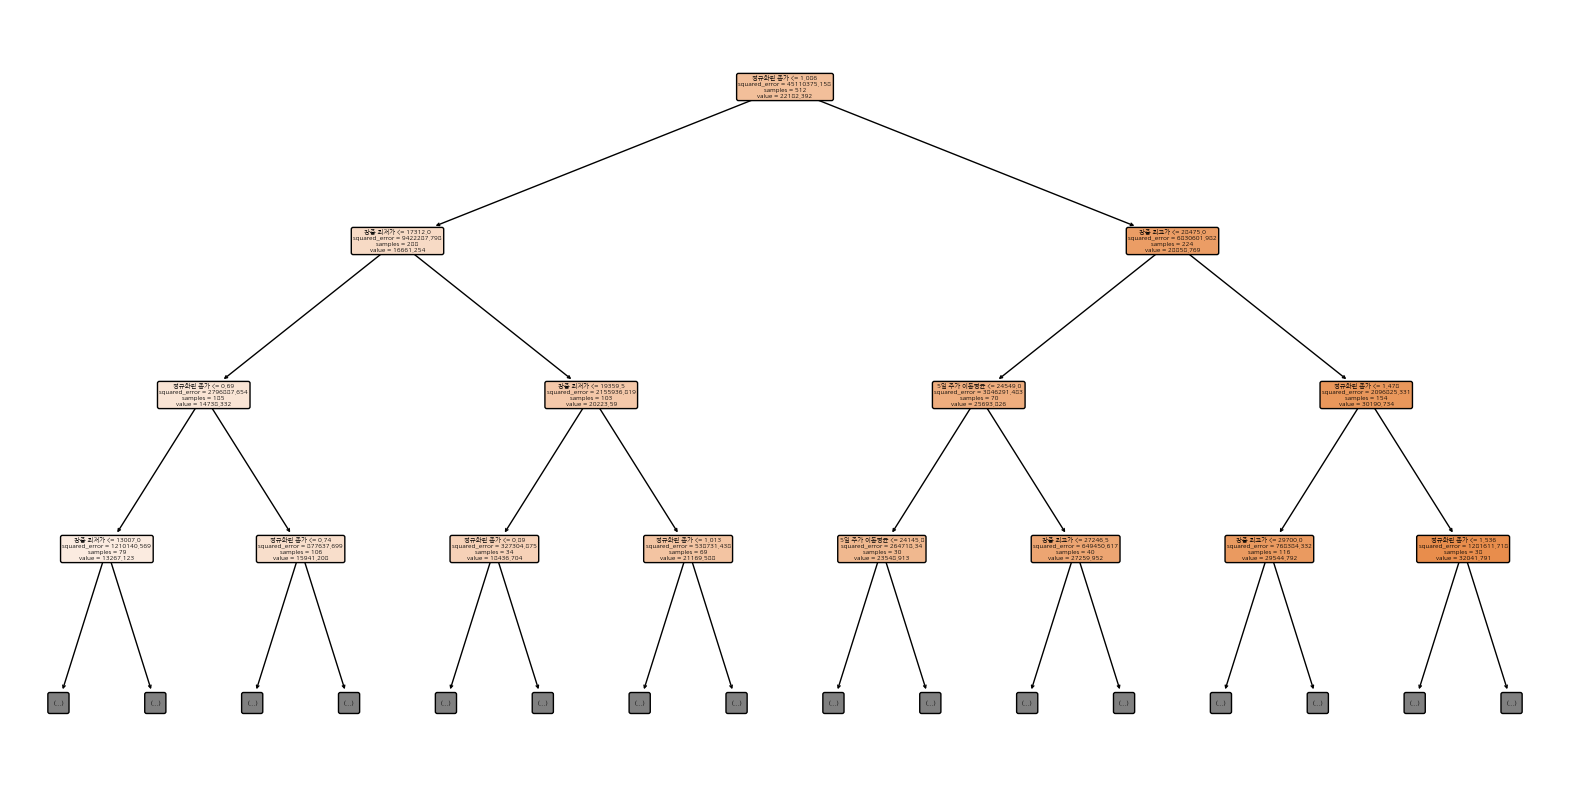

In [ ]:


# 모델 훈련 및 특성 중요도 추출 예시
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 특성 중요도 출력
feature_importances = model.feature_importances_
print("Feature importances:", feature_importances)

# 이미 모델이 훈련되어 있으므로, 특성 중요도에서 가장 높은 값을 가진 특성과 그 값을 출력하는 코드 추가
max_importance_index = np.argmax(feature_importances)
max_importance_feature = X_train.columns[max_importance_index]
max_importance_value = feature_importances[max_importance_index]

print(f"가장 높은 특성 중요도: {max_importance_value}, 해당 특성명: {max_importance_feature}")
# 첫 번째 결정 나무 시각화
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], filled=True, feature_names=X_train.columns, rounded=True, max_depth=3)
plt.show()

---
# Permutation Importance 출력

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# 이미 훈련된 모델을 사용하여 Permutation Importance 계산
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)

# 특성 중요도 시각화
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
# weight의 왼쪽값은 중요도의 평균 오르쪽 +-는 표준편차

Weight,Feature
1.0730 ± 0.1177,정규화된 종가
0.0008 ± 0.0005,60일 주가 이동평균
0.0004 ± 0.0008,거래량
0.0001 ± 0.0009,정규화된 120일 주가 이동평균
0 ± 0.0000,Date
0 ± 0.0000,종목 번호
-0.0007 ± 0.0010,120일 주가 이동평균
-0.0010 ± 0.0048,전날 종가 대비 변동량
-0.0010 ± 0.0020,정규화된 60일 주가 이동평균
-0.0022 ± 0.0013,20일 주가 이동평균


In [ ]:
"""
1. 랜덤 포레스트의 내장 특성 중요도
랜덤 포레스트에서 제공하는 내장 특성 중요도는 특성을 기반으로 한 노드 분할이 모델의 성능 향상에 얼마나 기여하는지를 기반으로 합니다.
 이는 각 특성에 대해 노드 분할 시 불순도 감소량(예: 지니 불순도, 엔트로피 감소)을 평균내어 계산됩니다. 특성이 노드 분할에 더 자주 사용되고,
  분할 시 불순도를 크게 감소시키면 해당 특성의 중요도가 높아집니다.

2. eli5와 Permutation Importance
eli5 라이브러리에서 사용하는 Permutation Importance는 모델이 이미 훈련된 후에 평가 단계에서 적용됩니다.
 이 방법은 특정 특성의 값을 무작위로 섞어서 모델의 예측 성능에 미치는 영향을 측정합니다.
  성능 저하가 클수록 해당 특성은 모델 예측에 더 중요하다고 평가됩니다.
   이 방법은 모델의 내부 작동 방식과 무관하게 적용될 수 있으며, 모델의 종류에 상관없이 일관된 방식으로 특성 중요도를 평가합니다.

차이점의 원인
평가 방식의 차이: 내장 특성 중요도는 모델 훈련 과정에서 계산되며, 특성이 얼마나 잘 분할하는지에 초점을 맞춥니다.
 반면, Permutation Importance는 모델 훈련 후 특성의 값을 무작위로 변경함으로써 특성이 예측에 미치는 영향을 평가합니다.
데이터 의존성: Permutation Importance는 특정 데이터 세트에 대한 모델의 성능 변화를 측정하기 때문에, 다른 데이터 세트에서는 다른 결과를 얻을 수 있습니다.
 이는 특성 중요도가 데이터 분포에 따라 달라질 수 있음을 의미합니다.
모델의 복잡성과 상호작용: 랜덤 포레스트 내장 특성 중요도는 특성 간의 상호작용을 반영할 수 있지만, 복잡한 상호작용이나 특성 간의 의존성을 완전히 포착하지 못할 수 있습니다.
 Permutation Importance는 모델의 전반적인 예측 성능 변화를 통해 이러한 상호작용을 간접적으로 반영할 수 있습니다.
이러한 차이점 때문에, 같은 데이터와 모델을 사용하더라도 두 방법에서 도출된 특성 중요도가 다를 수 있습니다.
 따라서, 모델의 해석을 위해 하나의 방법에만 의존하기보다는 여러 방법을 종합적으로 고려하는 것이 좋습니다.
"""

'\n1. 랜덤 포레스트의 내장 특성 중요도\n랜덤 포레스트에서 제공하는 내장 특성 중요도는 특성을 기반으로 한 노드 분할이 모델의 성능 향상에 얼마나 기여하는지를 기반으로 합니다.\n 이는 각 특성에 대해 노드 분할 시 불순도 감소량(예: 지니 불순도, 엔트로피 감소)을 평균내어 계산됩니다. 특성이 노드 분할에 더 자주 사용되고,\n  분할 시 불순도를 크게 감소시키면 해당 특성의 중요도가 높아집니다.\n\n2. eli5와 Permutation Importance\neli5 라이브러리에서 사용하는 Permutation Importance는 모델이 이미 훈련된 후에 평가 단계에서 적용됩니다.\n 이 방법은 특정 특성의 값을 무작위로 섞어서 모델의 예측 성능에 미치는 영향을 측정합니다.\n  성능 저하가 클수록 해당 특성은 모델 예측에 더 중요하다고 평가됩니다.\n   이 방법은 모델의 내부 작동 방식과 무관하게 적용될 수 있으며, 모델의 종류에 상관없이 일관된 방식으로 특성 중요도를 평가합니다.\n\n차이점의 원인\n평가 방식의 차이: 내장 특성 중요도는 모델 훈련 과정에서 계산되며, 특성이 얼마나 잘 분할하는지에 초점을 맞춥니다.\n 반면, Permutation Importance는 모델 훈련 후 특성의 값을 무작위로 변경함으로써 특성이 예측에 미치는 영향을 평가합니다.\n데이터 의존성: Permutation Importance는 특정 데이터 세트에 대한 모델의 성능 변화를 측정하기 때문에, 다른 데이터 세트에서는 다른 결과를 얻을 수 있습니다.\n 이는 특성 중요도가 데이터 분포에 따라 달라질 수 있음을 의미합니다.\n모델의 복잡성과 상호작용: 랜덤 포레스트 내장 특성 중요도는 특성 간의 상호작용을 반영할 수 있지만, 복잡한 상호작용이나 특성 간의 의존성을 완전히 포착하지 못할 수 있습니다.\n Permutation Importance는 모델의 전반적인 예측 성능 변화를 통해 이러한 상호작용을 간접적으로 반영할 수 있습니다.\n이러한 차이점 때문에, 같은 

---
# 주가 예측해보기(그냥 심심해서 지피티로..)(위에 모델 학습한 종목과 같은 주식 종목으로 봐야하나.?)
## 2024-02-27기준 2024-02-28 대한항공에 대해 예측(22642.76? 226400원이 종가로 볼 수 있겠네)

In [ ]:
import os
import pandas as pd
import joblib
from datetime import datetime, timedelta

def convert_date_to_numeric(date):
    """날짜를 수치형으로 변환하는 함수"""
    numeric_date = date.year * 10000 + date.month * 100 + date.day
    return numeric_date

def get_user_input_for_basic_features(feature_names, stock_name):
    user_input_features = {}
    print("모델 예측에 필요한 기본 특성 및 계산된 특성 값을 입력하세요:")

    # 기본 특성 값 입력 받기
    for feature in feature_names:
        # '정규화된' 값과 같이 사용자가 직접 입력하지 않아야 하는 특성은 제외
        if not feature.startswith("정규화된") and not feature.endswith("일일 상승률"):
            value = input(f"{feature} 값: ")
            try:
                user_input_features[feature] = float(value)
            except ValueError:
                print(f"오류: '{feature}'에 유효한 숫자를 입력하세요. 기본값 0으로 설정됩니다.")
                user_input_features[feature] = 0.0

    # 계산된 특성 추가
    user_input_features[f'정규화된 10일 주가 이동평균'] = user_input_features.get('10일 주가 이동평균', 0)
    user_input_features[f'정규화된 120일 주가 이동평균'] = user_input_features.get('120일 주가 이동평균', 0)
    user_input_features[f'정규화된 20일 주가 이동평균'] = user_input_features.get('20일 주가 이동평균', 0)
    user_input_features[f'정규화된 5일 주가 이동평균'] = user_input_features.get('5일 주가 이동평균', 0)
    user_input_features[f'정규화된 60일 주가 이동평균'] = user_input_features.get('60일 주가 이동평균', 0)

    # '정규화된 종가' 계산
    user_input_features['정규화된 종가'] = user_input_features.get('시작가', 0) + user_input_features.get('전날 종가 대비 변동량', 0)

    # 종목명을 기반으로 한 '일일 상승률' 추가
    user_input_features[f'{stock_name} 일일 상승률'] = user_input_features.get('전날 종가 대비 변동량', 0) / user_input_features.get('시작가', 0) * 100

    return user_input_features

def prepare_data_for_prediction(date_to_predict, folder, stock_name, model, ask_for_input=False):
    """예측을 위한 데이터 준비 함수"""
    next_day = pd.to_datetime(date_to_predict) - timedelta(days=1)
    data_path = os.path.join(folder, f'{stock_name}.csv')

    try:
            # 데이터 로드
       df = pd.read_csv(data_path)

    # 주어진 날짜에 해당하는 데이터 추출
       df['Date'] = pd.to_datetime(df['Date'])
       df_prev_day = df[df['Date'] == next_day]

       if df_prev_day.empty:
           raise ValueError(f"{next_day.date()}에 대한 데이터가 없습니다. 해당 날짜의 데이터가 필요합니다.")

    # 필요한 컬럼만 선택
       columns_needed = model.feature_names_in_
       df_to_predict = df_prev_day[columns_needed].iloc[0]

    # 날짜 컬럼이 있다면, 수치형으로 변환
       if 'Date' in df_to_predict.index:
           df_to_predict['Date'] = convert_date_to_numeric(next_day)

    except ValueError:
        if ask_for_input:
            print("데이터가 존재하지 않습니다. 직접 입력하시겠습니까? (y/n)")
            if input().lower() == 'y':
                feature_values = get_user_input_for_basic_features([f for f in model.feature_names_in_ if f != 'Date'], stock_name)
                df_to_predict = pd.Series(feature_values)
                df_to_predict['Date'] = convert_date_to_numeric(next_day)
            else:
                raise Exception("데이터가 없어 예측을 수행할 수 없습니다.")
        else:
            raise Exception("데이터가 없어 예측을 수행할 수 없습니다.")

    # 모델 학습에 사용된 특성 순서로 DataFrame을 생성합니다.
    df_to_predict = pd.DataFrame([df_to_predict], columns=model.feature_names_in_)

    return df_to_predict

In [ ]:
# 사용자 입력 처리 및 모델 예측
folder = "KOSPI_price"
stock_name = input("예측하고 싶은 주식 이름을 입력하세요: ")
date_to_predict = input("예측하고 싶은 날짜를 입력하세요. (형식 YYYY-MM-DD): ")

model_path = os.path.join(folder, f'model_{stock_name}.joblib')
model = joblib.load(model_path)

try:
    df_to_predict = prepare_data_for_prediction(date_to_predict, folder, stock_name, model, ask_for_input=True)
    predicted_price = model.predict(df_to_predict)
    print(f"{stock_name} 주식의 {date_to_predict}에 대한 예측 종가는 {predicted_price[0]}입니다.")
except Exception as e:
    print(e)

예측하고 싶은 주식 이름을 입력하세요: 대한항공
예측하고 싶은 날짜를 입력하세요. (형식 YYYY-MM-DD): 2024-03-01
데이터가 존재하지 않습니다. 직접 입력하시겠습니까? (y/n)
y
모델 예측에 필요한 기본 특성 및 계산된 특성 값을 입력하세요:
시작가 값: 4444
장중 최고가 값: 4444
장중 최저가 값: 44444
거래량 값: 44444
전날 종가 대비 변동량 값: 444
종목 번호 값: 44444
5일 주가 이동평균 값: 444
10일 주가 이동평균 값: 4444
20일 주가 이동평균 값: 4444
60일 주가 이동평균 값: 4444
120일 주가 이동평균 값: 4444
대한항공 주식의 2024-03-01에 대한 예측 종가는 30745.79입니다.
